
본 튜토리얼은 PSSC(Postech Siam Student Chapter)의 머신러닝 에듀케이션 챕터에서 제공되는 컨텐츠입니다.
상업적으로 무단 배포하실 수 없으며, 문의는 아래의 이메일로 연락주세요.

- 제작자 : 이성헌 (Postech GSAI 박사과정)
- 연락처 : shlee0125@posetech.ac.kr

# [왕초보 머신러닝 파티 시즌 2] ㅣ Ch 01. Machine Learning Overview

- 목표
    1. 실제 데이터를 통한 머신러닝 경험해보기
    2. `pandas` (판다스) 라이브러리를 통해 데이터를 불러오고 다루는 법 익히기
    3. `sklearn` (사이킷런) 라이브러리를 통해 머신러닝 모델 사용하는 법 익히기

In [94]:
# 시작하기 전에... Python과 sklearn이 적절하게 준비되어 있는지 체크!

## Python version이 3.5 이상이어야 합니다.
import sys
assert sys.version_info >= (3, 5)

## scikit-learn version이 0.20 이상이어야 합니다.
import sklearn
assert sklearn.__version__ >= "0.20"

- `import sys`에서 `sys`는 Python을 제어하는 System으로 접근하는 코드입니다. 
- `assert` 명령어는 뒤의 조건문(boolean)이 `True`가 아니면 `AssertError`를 발생시킵니다. 필요조건을 프로그래밍 하는데에 유용하게 쓰입니다.
- `sklearn`([Scikit-Learn](https://scikit-learn.org/stable/index.html))은 대표적인 머신러닝 라이브러리입니다. 저희는 사이킷런을 활용해 머신러닝을 학습할 것입니다.


# 문제 정의
__돈이 사람을 행복하게 만드는지 알아보는 연구__ 를 머신러닝을 통해 수행한다고 해봅시다.

# 데이터 준비
머신러닝은 __데이터 기반__ 모델이기 때문에 적절한 데이터를 먼저 준비해야 합니다.
다음은 OECD 웹사이트에서 __더 나은 삶의 지표__ (Better Life Index) 데이터와 IMF 웹사이트에서 __1인당 GDP 통계__ 를 내려받는 코드입니다.

In [96]:
import os
datapath = os.path.join("datasets","lifesat","")    # datasets/lifesat/ 라는 경로를 저장합니다.

- `import os`에서 `os`는 현재 사용자의 운영체제(opearating system)에 접근하는 코드 입니다. 디렉토리에 접근하거나 폴더를 만들때 사용합니다.

In [98]:

import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"

os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)
    print("Download Complete!", filename)


Download Complete! oecd_bli_2015.csv
Download Complete! gdp_per_capita.csv


- `urllib.request`는 url로 접근하는 라이브러리 중에서 다운로드와 같은 요청을 수행하는 함수 입니다.
- `os.makedirs`는 특정 디렉토리(폴더)를 만드는 명령어입니다. 우리가 미리 저장해둔 datapath에 해당하는 폴더를 생성하며, `exist_ok=True`는 해당 디렉토리가 이미 존재한다면 넘어가고 없다면 폴더를 생성하도록 합니다.
- 위 코드는 저자의 깃허브 주소에 들어가 저장된 파일을 다운로드 받는 코드입니다.
- 꼭 이렇게 코딩으로 하지 않아도 폴더를 만들고 해당 사이트에 들어가 파일을 다운받아 저장해도 됩니다.

# 데이터 불러오기

In [165]:
## 01

import pandas as pd

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [166]:
## 02

oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [167]:
## 03

gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


# 데이터 정제

## 데이터 살펴보기 1. 특정 조건을 만족시키는 데이터만 추출하기

In [168]:
## 04

oecd_bli["INEQUALITY"]

0       TOT
1       TOT
2       TOT
3       TOT
4       TOT
       ... 
3287    WMN
3288    WMN
3289    WMN
3290    WMN
3291    WMN
Name: INEQUALITY, Length: 3292, dtype: object

In [169]:
## 05

oecd_bli["INEQUALITY"].unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [170]:
## 06

oecd_bli["INEQUALITY"] == "TOT"

0       False
1       False
2       False
3       False
4       False
        ...  
3287    False
3288    False
3289    False
3290    False
3291    False
Name: INEQUALITY, Length: 3292, dtype: bool

In [171]:
## 07

oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.90,NaN,NaN
3214,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.48,E,Estimated value
3215,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,E,Estimated value
3216,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.62,NaN,NaN


In [172]:
## 08

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

## 데이터 살펴보기 2. 필요한 정보만으로 데이터 재배치하기
oecd 데이터에는 수많은 정보들이 나열되어 있습니다.
우리는 이 정보를 '각 국가별'로 '지표들'의 '값'만을 추출해서 사용하고 싶습니다.

`pandas`의 `.pivot` 함수는 데이터 프레임을 재배치해주는 함수입니다.
1. index : 인덱스로 사용될 컬럼을 설정해줍니다. 여기서는 각 국가별로 정보를 보고 싶으므로 'Country'로 설정해줍니다.
2. columns : 특성으로 사용하고 싶은 컬럼을 설정해줍니다. 여기서는 여러 지표를 담은 'Indicator'로 설정해줍니다.
3. values : 각 (index, columns)에 어떤 값이 들어가야 하는지 설정해줍니다. 이 값은 'Values'에 들어 있으므로 이것으로 설정해줍니다.

In [173]:
## 09

oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [174]:
## 10

oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

# 데이터 살펴보기 3. 두 데이터셋 합치기

서로 다른 출처에서 얻은 데이터셋을 합치려면, 일관성을 가지도록 하는 것이 좋습니다.
즉, 두 데이터 셋의 배열 기준이 같도록 하거나 각 특성의 의미가 잘 드러나도록 설정해주는 것이 좋습니다.

In [175]:
## 11

gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


`2015` 특성은 2015년 1인당 GDP (GDP per capita)를 의미합니다.
그러나 이 상태 그대로 다른 데이터셋과 합쳐 버리면 그 의미가 무엇인지 알기 어렵습니다.
따라서 특성의 이름을 `2015`에서 `GDP per capita`로 바꿉시다.

In [176]:
## 12

gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)         # 여기서 inplace = True 옵션은 덮어쓰기 옵션입니다.

In [177]:
## 13

gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


oecd 데이터를 국가 이름별로 나열했듯, gdp 데이터도 국가 이름별로 나열해 봅시다.

In [178]:
## 14

gdp_per_capita.set_index("Country", inplace=True)


In [179]:
## 15

gdp_per_capita

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0


이제 두 데이터를 합칠 준비가 되었습니다. 왼쪽에는 OECD 데이터가, 오른쪽에는 GDP 데이터가 오도록 합쳐봅시다.

In [180]:
## 16

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)   # 데이터 배열 순서를 GDP per capita 값이 낮은 것부터 높은 것 순으로 배열합니다.

In [181]:
## 17

full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


# 특성공학
우리 문제에 필요한 특성은 1인당 GDP (`GDP per capita`)와 삶의 만족도 (`Life satisfaction`) 입니다.
나머지 특성들은 필요가 없으므로 제거해주는 것이 좋습니다. 

In [184]:
## 18

# 이 코드는 실험을 위해 만들어진 코드 입니다. 
# 우리는 데이터 셋에서 몇몇 국가들을 제거해볼 것입니다.
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

In [185]:
## 19

full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


# 데이터 전처리

지금까지의 과정은 하나의 함수로 만들어두는 것이 좋습니다.
함수로 정리해두면 이 코드를 누군가와 공유할 때에 간단하게 이 사람이 어떻게 데이터를 처리했는지 이해하기가 쉽기 때문입니다. 
또 혹자는 중간과정을 그다지 궁금해하지 않을 수 있기 떄문에 함수로 설정해주는 것이 좋기도 합니다.


In [186]:
## 20

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [187]:
## 21

# 데이터를 다시 불러와서 그 결과를 비교해봅시다.
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [188]:
## 22

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [189]:
## 23

country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


# 데이터 관찰
이제 데이터가 준비되었습니다.
우리에게 남은 일은 적당한 모델을 선택해 데이터를 학습시키는 것입니다. 
그전에 어떤 모델이 가장 적절할 지 데이터를 관찰하면서 아이디어를 얻어봅시다.

In [193]:
## 24

import numpy as np
import matplotlib.pyplot as plt


X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

Text(0, 0.5, 'Life satisfaction')

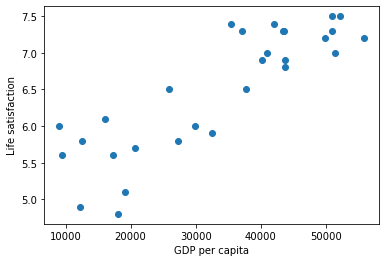

In [196]:
## 25

plt.scatter(X,y)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

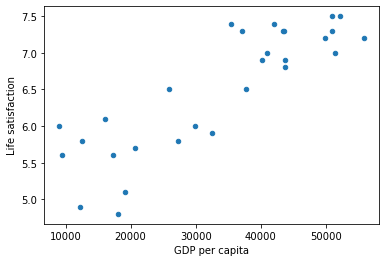

In [195]:
## 26

# Pandas dataframe은 훨씬 편리하게 시각화할 수 있는 기능들을 제공합니다.
country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')

데이터가 얼추 선형성을 띄는 것처럼 보입니다. 
그러므로 선형모델을 선택하는 것이 좋아보입니다.

# 머신러닝 모델 훈련

In [197]:
## 27

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [199]:
## 28

lin_reg.coef_, lin_reg.intercept_

(array([[4.91154459e-05]]), array([4.8530528]))

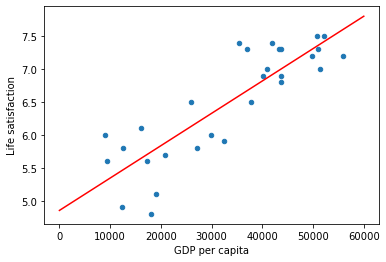

In [209]:
## 29

x_ = np.linspace(0,60000,60000)
y_ = lin_reg.coef_[0]*x_ + lin_reg.intercept_

country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.plot(x_,y_, '-r')

In [231]:
## 30

from sklearn.metrics import mean_squared_error

mean_squared_error(y, lin_reg.predict(X))

0.18075033705835142

# 모델 평가

In [213]:
## 31

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

def test_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [214]:
## 32

test_country = test_country_stats(oecd_bli, gdp_per_capita)
test_country

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [215]:
## 33

X_test = np.c_[test_country['GDP per capita']]
y_test = np.c_[test_country['Life satisfaction']]

In [216]:
## 34

y_pred = lin_reg.predict(X_test)

In [217]:
## 35

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

2.6818932487474685

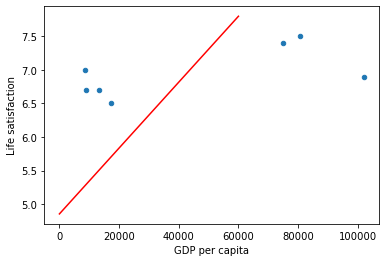

In [218]:
## 36

x_ = np.linspace(0,60000,60000)
y_ = lin_reg.coef_[0]*x_ + lin_reg.intercept_

test_country.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.plot(x_,y_, '-r')

# 모델 개선
선형 모델이 그다지 좋은 점수를 얻지 못했습니다.
따라서 다른 모델을 선택해보기로 합니다.
여기서는 k-NN이라는 모델을 사용해보도록 하겠습니다. 

In [232]:
## 37

from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [233]:
## 38

y_pred2 = knn_reg.predict(X_test)
mean_squared_error(y_test, y_pred2)

0.8728571428571433

훨씬 점수가 좋습니다! 이를 통해서 우리는 선형모델보다 k-NN 모델이 이 데이터에 더 적합한 모델이라 생각할 수 있습니다.

In [224]:
## 39

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=30, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

# 오버피팅

In [230]:
## 40

mean_squared_error(pipeline_reg.predict(X),y)

0.01853632883769467

Text(0.5, 0, 'GDP per capita (USD)')

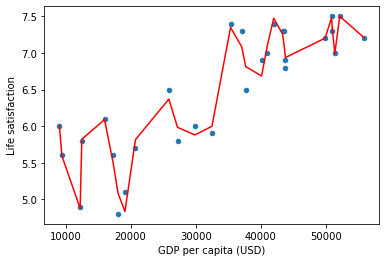

In [228]:
## 41

country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')

curve = pipeline_reg.predict(X)
plt.plot(X, curve, '-r')
plt.xlabel("GDP per capita (USD)")

In [234]:
## 42

y_pred3 = pipeline_reg.predict(X_test)
mean_squared_error(y_pred3, y_test)

2.7549066889349008e+35